# Mesh2d Basics

This is the basic introduction for using the `meshkernel` library.

`meshkernel` can be used for creating and manipulating various kinds of meshes.

The most common case deals with unstructured, two-dimensional meshes which is why this tutorial focuses on these.

At the very beginning, the necessary libraries have to be imported.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import Mesh2dFactory, MeshKernel

`meshkernel` provides a set of convenience methods for creating common meshes.

We use the `create_rectilinear_mesh` method to create simple meshes.
You can look at the documentation in order to find all its parameters.

In [17]:
mesh2d_input = Mesh2dFactory.create_rectilinear_mesh(3, 4)

`Mesh2dFactory`'s methods always return a `Mesh2D` instance.
`Mesh2D` has three mandatory attributes, which are enough to fully describe any unstructured mesh.

The first two are `node_x` and `node_y`.
They are one-dimensional `double` arrays, which describe the position of the nodes as can be seen below.

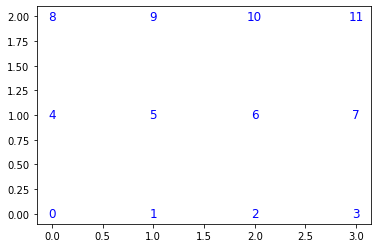

In [18]:
fig, ax = plt.subplots()

# Plot white points only for scaling the plot
ax.plot(mesh2d_input.node_x, mesh2d_input.node_y, "ow")

# Numbering the nodes
for i in range(mesh2d_input.node_x.size):
    ax.annotate(
        int(i),
        xy=(mesh2d_input.node_x[i], mesh2d_input.node_y[i]),
        ha="center",
        va="center",
        fontsize=12,
        color="blue",
    )

The third mandatory attribute is `edge_nodes`.
It describes the indices of the nodes that make up the edges.

Two indices describe one edge.
So in our case the indices 0-4, 1-5, 2-6, ... each describe one edge.

In [19]:
mesh2d_input.edge_nodes

array([ 0,  4,  1,  5,  2,  6,  3,  7,  4,  8,  5,  9,  6, 10,  7, 11,  1,
        0,  2,  1,  3,  2,  5,  4,  6,  5,  7,  6,  9,  8, 10,  9, 11, 10])

With all three parameters together we can plot the mesh.

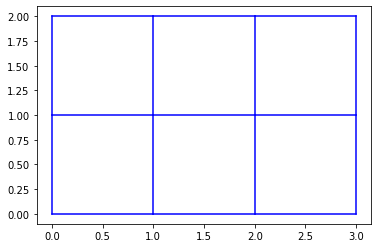

In [20]:
fig, ax = plt.subplots()
mesh2d_input.plot_edges(ax, "b-")

In order to interact with the `meshkernel` library, we create a new instance of the `MeshKernel` class.

The `is_geographic` parameter of its constructor describes whether the mesh is cartesian (`False`) or spherical (`True`). 

In [21]:
mk = MeshKernel(is_geographic=False)

Each instance holds it own state.
This state can be accessed with the corresponding getter and setter methods.

In [22]:
mk.mesh2d_set(mesh2d_input)

In [23]:
mesh2d_output_0 = mk.mesh2d_get()

We have now set mesh2d and immediately got it again, without asking `meshkernel` to execute any operations in between.

After we set the mesh2d, meshkernel calculated the face data and edge coordinates.

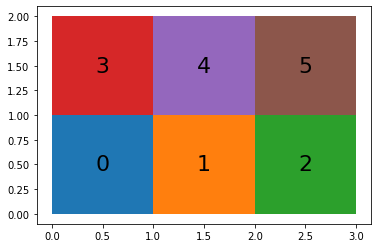

In [24]:
fig, ax = plt.subplots()
mesh2d_output_0.plot_faces(ax)

# Draw face index at the face's center
for face_index, (face_x, face_y) in enumerate(zip(mesh2d_output_0.face_x, mesh2d_output_0.face_y)):
    ax.text(face_x, face_y, face_index, ha="center", va="center", fontsize=22)

`meshkernel` also searches for the middle point of edges and adds them as parameters to the `Mesh2D` class.

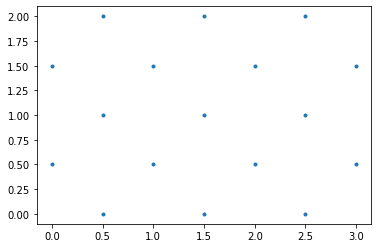

In [25]:
fig, ax = plt.subplots()
ax.plot(mesh2d_output_0.edge_x, mesh2d_output_0.edge_y, ".")

Until now everything *looked* structured, so let us add a few nodes to change that.

In [26]:
node_index_0 = mk.mesh2d_insert_node(4.0, 1.5)
node_index_1 = mk.mesh2d_insert_node(4.0, 2.5)

We also have to connect our nodes, otherwise `meshkernel` will garbage collect them.

In [27]:
edge_index_0 = mk.mesh2d_insert_edge(7, node_index_0)
edge_index_1 = mk.mesh2d_insert_edge(node_index_0, node_index_1)
edge_index_3 = mk.mesh2d_insert_edge(node_index_1, 11)

Let us get the new state.

In [28]:
mesh2d_output_1 = mk.mesh2d_get()

If we plot the output, we can also see that `meshkernel` immediately found a new face.

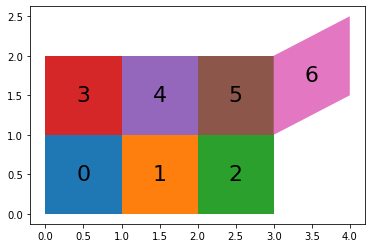

In [29]:
fig, ax = plt.subplots()
mesh2d_output_1.plot_faces(ax)

# Draw face index at the face's center
for face_index, (face_x, face_y) in enumerate(zip(mesh2d_output_1.face_x, mesh2d_output_1.face_y)):
    ax.text(face_x, face_y, face_index, ha="center", va="center", fontsize=22)

We can also delete nodes.

In [30]:
mk.mesh2d_delete_node(node_index_1)
mesh2d_output_2 = mk.mesh2d_get()

We are back to six faces, but one hanging edge remains.

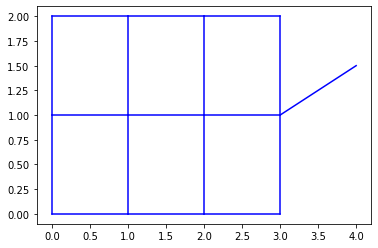

In [31]:
fig, ax = plt.subplots()
mesh2d_output_2.plot_edges(ax, "b-")

Quite often, hanging edges are unwanted.
That is why `meshkernel` provides methods to deal with them.
For once we can it can count hanging edges.

In [32]:
hanging_edges = mk.mesh2d_get_hanging_edges()
assert hanging_edges.size == 1

`meshkernel` can also find and delete them.

In [33]:
mk.mesh2d_delete_hanging_edges()
mesh2d_output_3 = mk.mesh2d_get()

After we have deleted the hanging edges, we are back at the original state.

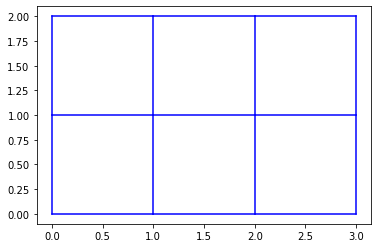

In [34]:
fig, ax = plt.subplots()
mesh2d_output_3.plot_edges(ax, "b-")